In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('transaction_data_updated.csv')

In [4]:
df.shape

(5315, 4)

In [5]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [6]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [7]:
#task 1
dfna = df.isna()

In [8]:
dfna.name.sum()

0

In [9]:
dfna.sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [10]:
#task2
tra = df.groupby('transaction', as_index=False).count()

In [11]:
tra

,transaction,date,name,minute
0,cancelled,1619,1619,1619
1,error,4,4,4
2,successfull,3692,3692,3692


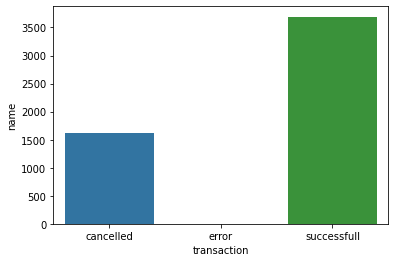

In [12]:
sns.barplot(x=tra.transaction, y=tra.name)

In [13]:
#task3

In [31]:
dft3 = df.query('transaction == "successfull"').groupby('name',as_index=False).agg({'name':'count'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


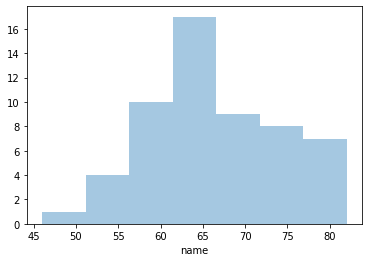

In [37]:
sns.distplot(dft3.name,kde=False)

In [33]:
dft3.describe()

,name
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [17]:
df_2 = pd.read_csv('transaction_data_updated_2.csv')

In [18]:
df_2.shape

(5315, 4)

In [19]:
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [60]:
user_vs_minute_pivot = df_2.groupby(['name','minute'],as_index=False).agg({'transaction' : 'count'}).pivot(index='minute',columns='name',values='transaction').fillna(0)

In [61]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [63]:
sns.displot(user_vs_minute_pivot.transaction)

AttributeError: 'DataFrame' object has no attribute 'transaction'

In [66]:
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [81]:
df_2.date = pd.to_datetime(df_2.date)

In [83]:
df_2.dtypes

date            datetime64[ns]
name                    object
transaction             object
minute                   int64
true_minutes             int64
dtype: object

In [82]:
df_2['true_minutes'] = df_2.date.dt.minute + df_2.date.dt.hour*60

In [85]:
df_2

,date,name,transaction,minute,true_minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [91]:
df_2.groupby('true_minutes',as_index=False).count()

,true_minutes,date,name,transaction,minute
0,0,64,64,64,64
1,1,77,77,77,77
2,2,68,68,68,68
3,3,65,65,65,65
4,4,57,57,57,57
...,...,...,...,...,...
85,85,68,68,68,68
86,86,52,52,52,52
87,87,59,59,59,59
88,88,62,62,62,62


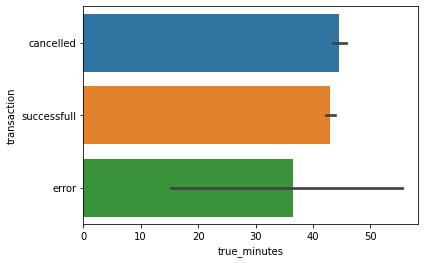

In [92]:
sns.barplot(x=df_2.true_minutes, y=df_2.transaction)

In [304]:
# доп.задание 
df_logs = pd.read_csv('shared/homeworks/python_ds_miniprojects/5_subsid/subsid/prod_activations_logs.csv',sep=';')
df_s_1  = pd.read_csv('shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_1.csv',sep=';')
df_s_2  = pd.read_csv('shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_2.csv',sep=';')
df_s_3  = pd.read_csv('shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_3.csv',sep=';')


In [305]:
df_logs.head()

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43


In [306]:
df_s_1.head()

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25


In [307]:
df_s_2.head()

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,17-03-2020 10:17
1,4,NaN,7421,12-03-2020 11:25
2,7,8362218,9879,05-03-2020 11:42
3,2,2185490,3210,16-03-2020 16:28


In [308]:
df_s_3.head()

,FILIAL_ID,PROD_ID,SUBS_ID,ACT_DTTM
0,3,1499,id5764122,18-03-2020 15:44
1,6,3020,id7642700,15-03-2020 14:21
2,2,5677,id1374509,17-03-2020 11:48


In [110]:
df_s_2.isnull().sum()

FILIAL_ID    0
SUBS_ID      1
PROD_ID      0
ACT_DTTM     0
dtype: int64

In [309]:
df_s = pd.DataFrame()

In [310]:
df_s = pd.concat([df_s, df_s_1])

In [311]:
df_s = pd.concat([df_s, df_s_2])

In [312]:
df_s = pd.concat([df_s, df_s_3])

In [313]:
df_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [314]:
df_s 

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
1,NaN,4,7421,12-03-2020 11:25
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [315]:
df_s = df_s.dropna()

In [316]:
df_s

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [317]:
df_s.dtypes

SUBS_ID      object
FILIAL_ID     int64
PROD_ID       int64
ACT_DTTM     object
dtype: object

In [318]:
def addid(x):
    idg = 'id'
    for _ in x:
        if x.startswith('id'):
            return x
        else:
            t = 'id' + x
            return t

In [319]:
df_s['SUBS_ID'] = df_s.SUBS_ID.apply(addid)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [320]:
df_s

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [321]:
df_s.dtypes

SUBS_ID      object
FILIAL_ID     int64
PROD_ID       int64
ACT_DTTM     object
dtype: object

In [322]:
df_logs.dtypes

SUBS_ID       object
PROD_ID        int64
START_DTTM    object
END_DTTM      object
dtype: object

In [323]:
mega = df_s.merge(df_logs, on=['SUBS_ID','PROD_ID'])

In [324]:
df_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [325]:
df_s

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [289]:
for i in df_logs.SUBS_ID:
    for j in df_s.SUBS_ID:
        if i == j:
            print('bingo')

bingo
bingo
bingo
bingo
bingo


In [326]:
mega

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,20-03-2020 14:59,20-03-2020 14:59,01-12-2020 00:00
1,id7646509,5,6431,19-03-2020 13:00,19-03-2020 13:00,19-03-2020 13:03
2,id5416547,3,1743,17-03-2020 10:17,17-03-2020 10:17,25-03-2020 11:00
3,id2185490,2,3210,16-03-2020 16:28,16-03-2020 16:28,01-12-2020 00:00
4,id7642700,6,3020,15-03-2020 14:21,15-03-2020 14:21,15-03-2020 23:42


In [328]:
mega.ACT_DTTM = pd.to_datetime(mega.ACT_DTTM, format='%d-%m-%Y %H:%M')
mega.START_DTTM = pd.to_datetime(mega.START_DTTM, format='%d-%m-%Y %H:%M')
mega.END_DTTM = pd.to_datetime(mega.END_DTTM, format='%d-%m-%Y %H:%M')


In [329]:
mega

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00
1,id7646509,5,6431,2020-03-19 13:00:00,2020-03-19 13:00:00,2020-03-19 13:03:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00


In [296]:
mega.dtypes

SUBS_ID               object
FILIAL_ID              int64
PROD_ID                int64
ACT_DTTM      datetime64[ns]
START_DTTM    datetime64[ns]
END_DTTM      datetime64[ns]
dtype: object

In [330]:
mega['diff'] = mega.END_DTTM - mega.START_DTTM

In [331]:
mega

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,diff
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
1,id7646509,5,6431,2020-03-19 13:00:00,2020-03-19 13:00:00,2020-03-19 13:03:00,0 days 00:03:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [334]:
mega.query('diff > "5m"').sort_values('diff',ascending=False)

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,diff
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00
